<a href="https://colab.research.google.com/github/jaedeokhan/20_1_AI_Introduce/blob/master/pratice/0519TUE_Lab_regularization_dropout_before.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install tensorflow_gpu==2.0.0

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 450kB 48.5MB/s 
     |████████████████████████████████| 3.8MB 42.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=30b880dbc35a84721d45ee4817b1a2cfe7231fd011f827b0eef6d2f3951773e2
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3

In [0]:
pip install keras==2.3.1

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
len(train_data)

25000

In [0]:
len(test_data)

25000

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

1646592/1641221 [==============================] - 1s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [0]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.4912 - acc: 0.8179 - val_loss: 0.3619 - val_acc: 0.8775
Epoch 2/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.2766 - acc: 0.9056 - val_loss: 0.3201 - val_acc: 0.8707
Epoch 3/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.2108 - acc: 0.9234 - val_loss: 0.2781 - val_acc: 0.8909
Epoch 4/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.1746 - acc: 0.9388 - val_loss: 0.2874 - val_acc: 0.8860
Epoch 5/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.1508 - acc: 0.9470 - val_loss: 0.3061 - val_acc: 0.8817
Epoch 6/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.1324 - acc: 0.9543 - val_loss: 0.3231 - val_acc: 0.8784
Epoch 7/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.1191 - acc: 0.9588 - val_loss: 0.3455 - 

In [4]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']

NameError: ignored

### L2 규제 패널티 효과

In [3]:
from keras import regularizers

# --> Insert your code here



l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

Using TensorFlow backend.


NameError: ignored

In [0]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.4912 - accuracy: 0.8179 - val_loss: 0.3763 - val_accuracy: 0.8773
Epoch 2/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.3075 - accuracy: 0.9076 - val_loss: 0.3560 - val_accuracy: 0.8715
Epoch 3/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.2596 - accuracy: 0.9221 - val_loss: 0.3194 - val_accuracy: 0.8896
Epoch 4/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.2379 - accuracy: 0.9321 - val_loss: 0.3276 - val_accuracy: 0.8854
Epoch 5/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.2225 - accuracy: 0.9374 - val_loss: 0.3389 - val_accuracy: 0.8810
Epoch 6/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.2135 - accuracy: 0.9401 - val_loss: 0.3970 - val_accuracy: 0.8616
Epoch 7/20
25000/25000 [==============================] - 3s 1

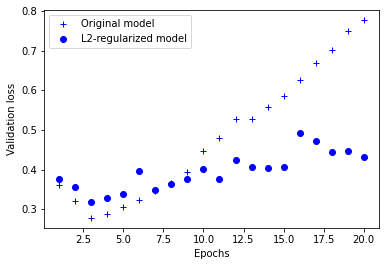

In [0]:
import matplotlib.pyplot as plt

l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### l1(0.0001) 모델과 비교

In [0]:
l1_model = models.Sequential()
# --> Insert your code here

In [0]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [0]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.5638 - accuracy: 0.8174 - val_loss: 0.4336 - val_accuracy: 0.8757
Epoch 2/20
25000/25000 [==============================] - 3s 131us/step - loss: 0.3814 - accuracy: 0.8931 - val_loss: 0.3757 - val_accuracy: 0.8870
Epoch 3/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.3387 - accuracy: 0.9043 - val_loss: 0.3918 - val_accuracy: 0.8718
Epoch 4/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.3220 - accuracy: 0.9104 - val_loss: 0.3615 - val_accuracy: 0.8866
Epoch 5/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.3106 - accuracy: 0.9142 - val_loss: 0.3661 - val_accuracy: 0.8844
Epoch 6/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.3019 - accuracy: 0.9164 - val_loss: 0.3772 - val_accuracy: 0.8814
Epoch 7/20
25000/25000 [==============================] - 3s 1

In [1]:
l1_model_val_loss = l1_model_hist.history['val_loss']
 
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

NameError: ignored

### l1_l2(l1=0.0001, l2=0.0001)모델과 비교

In [0]:
l1l2_model = models.Sequential()
# --> Insert your code here

In [0]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [0]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 137us/step - loss: 0.5582 - accuracy: 0.8163 - val_loss: 0.4394 - val_accuracy: 0.8677
Epoch 2/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.3680 - accuracy: 0.8962 - val_loss: 0.4105 - val_accuracy: 0.8621
Epoch 3/20
25000/25000 [==============================] - 3s 131us/step - loss: 0.3286 - accuracy: 0.9066 - val_loss: 0.3580 - val_accuracy: 0.8882
Epoch 4/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.3133 - accuracy: 0.9122 - val_loss: 0.3645 - val_accuracy: 0.8841
Epoch 5/20
25000/25000 [==============================] - 3s 131us/step - loss: 0.3009 - accuracy: 0.9175 - val_loss: 0.3605 - val_accuracy: 0.8872
Epoch 6/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.2934 - accuracy: 0.9195 - val_loss: 0.3637 - val_accuracy: 0.8849
Epoch 7/20
25000/25000 [==============================] - 3s 1

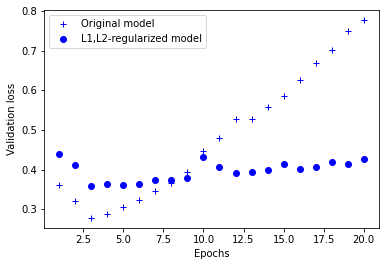

In [0]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### Drop out 효과

In [0]:
dpt_model = models.Sequential()
# --> Insert your code here

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [0]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.6158 - accuracy: 0.6525 - val_loss: 0.5026 - val_accuracy: 0.8607
Epoch 2/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.4794 - accuracy: 0.7927 - val_loss: 0.3741 - val_accuracy: 0.8804
Epoch 3/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.3838 - accuracy: 0.8524 - val_loss: 0.3066 - val_accuracy: 0.8868
Epoch 4/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.3227 - accuracy: 0.8828 - val_loss: 0.2834 - val_accuracy: 0.8888
Epoch 5/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.2761 - accuracy: 0.9076 - val_loss: 0.2874 - val_accuracy: 0.8862
Epoch 6/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.2391 - accuracy: 0.9187 - val_loss: 0.2863 - val_accuracy: 0.8887
Epoch 7/20
25000/25000 [==============================] - 3s 1

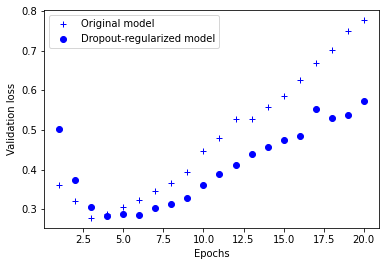

In [0]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()